# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [10]:
data = pd.read_csv(r'C:\Users\MekChou\OneDrive\Code\Udemy\UdemyDSBootcamp\Data\S38_L258\Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

<bound method DataFrame.drop_duplicates of              name   Longitude   Latitude      continent
0           Aruba  -69.982677  12.520880  North America
1     Afghanistan   66.004734  33.835231           Asia
2          Angola   17.537368 -12.293361         Africa
3        Anguilla  -63.064989  18.223959  North America
4         Albania   20.049834  41.142450         Europe
..            ...         ...        ...            ...
236         Samoa -172.164851 -13.753243        Oceania
237         Yemen   47.586762  15.909280           Asia
238  South Africa   25.083901 -29.000341         Africa
239        Zambia   27.774759 -13.458242         Africa
240      Zimbabwe   29.851441 -19.004204         Africa

[241 rows x 4 columns]>

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [15]:
pd.set_option('display.max_rows',20) 
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0, 'Europe':1, 'Africa':2, 'Asia':3, 'Oceania':4,'South America':5, 'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [19]:
x=data_mapped.iloc[:,1:4]

In [20]:
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,3
2,17.537368,-12.293361,2
3,-63.064989,18.223959,0
4,20.049834,41.142450,1
...,...,...,...
236,-172.164851,-13.753243,4
237,47.586762,15.909280,3
238,25.083901,-29.000341,2
239,27.774759,-13.458242,2


## Clustering

Use 4 clusters initially.

In [33]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans()

## Clustering results

In [34]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 3, 5, 2, 6, 6, 6, 3, 2, 3, 4, 5, 1, 5, 2, 1, 6, 3, 5, 6, 0, 0,
       7, 6, 3, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 7, 7, 5, 0, 6, 2, 7, 0, 0,
       5, 0, 4, 2, 5, 0, 2, 2, 2, 2, 3, 3, 6, 6, 3, 2, 6, 2, 0, 2, 3, 3,
       6, 6, 3, 6, 1, 2, 6, 6, 1, 0, 6, 3, 6, 0, 0, 0, 0, 0, 6, 2, 6, 2,
       1, 2, 7, 5, 2, 6, 2, 6, 7, 6, 7, 7, 5, 6, 3, 3, 6, 3, 6, 2, 6, 3,
       7, 3, 3, 5, 3, 7, 2, 2, 7, 6, 3, 7, 3, 0, 6, 2, 6, 7, 5, 6, 6, 6,
       7, 2, 0, 6, 6, 5, 3, 2, 1, 6, 0, 6, 7, 6, 7, 1, 5, 0, 2, 5, 5, 7,
       5, 1, 0, 1, 0, 2, 4, 6, 6, 7, 1, 1, 3, 3, 2, 4, 2, 7, 1, 1, 6, 2,
       7, 6, 2, 3, 4, 3, 6, 7, 5, 0, 3, 3, 5, 0, 7, 2, 0, 1, 0, 2, 6, 3,
       3, 2, 6, 0, 2, 6, 6, 6, 5, 2, 5, 3, 2, 0, 0, 7, 3, 3, 1, 4, 2, 6,
       3, 7, 5, 5, 6, 2, 2, 3, 6, 2, 2, 2, 2, 7, 1, 4, 4, 3, 5, 5, 5])

In [35]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,0,2
1,Afghanistan,66.004734,33.835231,3,3
2,Angola,17.537368,-12.293361,2,5
3,Anguilla,-63.064989,18.223959,0,2
4,Albania,20.049834,41.142450,1,6
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4,4
237,Yemen,47.586762,15.909280,3,3
238,South Africa,25.083901,-29.000341,2,5
239,Zambia,27.774759,-13.458242,2,5


## Plot the data

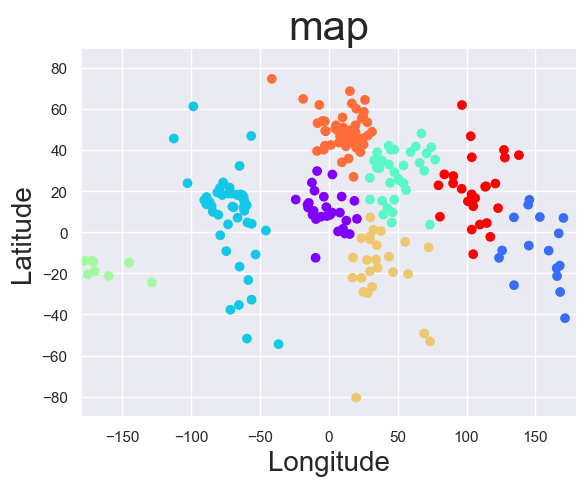

In [36]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.title('map',fontsize=30)
plt.show()


Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.